In [1]:
import os
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
import datetime
import textwrap

%matplotlib inline

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
colors = ['7A76C2', 'ff6e9c98', 'f62196', '18c0c4', 'f3907e', '66E9EC']

# Acceso a los datos

In [3]:
df_el = pd.read_csv('../data/raw/elichens/measures-OAQM_14_2021-05-01_2021-05-31.csv')
df_el = df_el.append(pd.read_csv('../data/raw/elichens/measures-OAQM_14_2021-06-01_2021-06-30.csv'))
df_ec = pd.read_csv('../data/raw/ecomesure/S4IoT+Station_20210501-000000_20210630-235500.csv', sep=';')
df_simaj = pd.read_csv('../data/raw/simaj/BaseDatos_EstacionVallarta_May-jun_2021.csv')

### EcoMesure

In [4]:
print('Shape for df is:',df_ec.shape)
df_ec.head(5)

Shape for df is: (87369, 18)


,Date (UTC),Date (America/Mexico_City),Temp,RH,Pressure,NO2,O3,COV,PM 1,PM 2.5,PM 10,Latitude,Longitude,Altitude,NO2 inst,O3 inst,Firmware Revision,Communication
0,2021-05-01 05:00:00,2021-05-01 00:00:00,22.175,48.056,837.800,109.857,29.317,247.991,54.110,62.395,84.142,20.680123333,-103.398555000,1619.0,118.070046,0.000000,2.98C,3G
1,2021-05-01 05:01:00,2021-05-01 00:01:00,22.239,47.852,837.767,109.447,29.317,248.230,54.304,62.654,83.883,20.679975000,-103.398530000,1618.4,118.138053,0.000000,2.98C,3G
2,2021-05-01 05:02:00,2021-05-01 00:02:00,22.282,47.759,837.812,109.040,29.317,248.469,54.498,62.913,83.689,20.680088333,-103.398520000,1618.2,101.330041,11.731267,2.98C,3G
3,2021-05-01 05:03:00,2021-05-01 00:03:00,22.196,48.029,837.823,109.201,29.708,248.469,54.628,63.107,83.366,20.680100000,-103.398555000,1618.0,101.238665,28.224506,2.98C,3G
4,2021-05-01 05:04:00,2021-05-01 00:04:00,22.207,47.923,837.812,109.362,28.134,248.708,54.757,63.366,83.430,20.680126667,-103.398525000,1617.9,101.249987,28.254724,2.98C,3G


### Elichens

In [5]:
print('Shape for df is:',df_el.shape)
df_el.head(5)

Shape for df is: (19719, 16)


,date,PM2_5,PM10,PM1_0,CO2,pressure,humidity,battery,lux,dB,run_time,mslPressure,temperature_int,temperature,NO2,O3
0,1622523529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.6,23.9,16.926372,46.516231
1,1622523319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.7,24.0,16.942621,47.308264
2,1622523071,NaN,NaN,NaN,NaN,842.8,46.7,2500.0,0.0,49.0,133200.0,842.8,NaN,NaN,NaN,NaN
3,1622522719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.7,24.0,16.935564,47.261701
4,1622522581,32.0,36.0,17.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### SIMAJ

In [6]:
print('Shape for df is',df_simaj.shape)
df_simaj.head(5)

Shape for df is (1442, 47)


,Date_Time,O3,STATUS,NO,STATUS2,NO2,STATUS3,NOX,STATUS4,SO2,...,NOX2,STATUS18,SO22,STATUS19,CO2,STATUS20,PM2.5 Digital,UV,UVI,STATUS21
0,2021-05-01T00:00:00-05:00,0.015,144,0.004,144,0.012,144,0.015,144,0.0019,...,0.015,144,0.0021,151,0.651,144,7.0,7.0,0.22,151
1,2021-05-01T01:00:00-05:00,0.015,144,0.003,144,0.011,144,0.013,144,0.0007,...,0.012,144,0.0009,144,0.630,144,7.0,7.0,0.22,151
2,2021-05-01T02:00:00-05:00,0.015,144,0.003,144,0.008,144,0.011,144,0.0003,...,0.011,144,0.0004,144,0.647,144,7.0,7.0,0.22,151
3,2021-05-01T03:00:00-05:00,0.014,144,0.002,144,0.009,144,0.011,144,0.0005,...,0.010,144,0.0007,144,0.637,144,7.0,7.0,0.22,151
4,2021-05-01T04:00:00-05:00,0.015,144,0.002,144,0.007,144,0.009,144,0.0004,...,0.008,144,0.0005,144,0.616,144,7.0,7.0,0.22,151


# Tratamiento de datos

### Elichens

In [7]:
df_el.sort_values('date', inplace=True)

df_el['datetime'] = pd.to_datetime(df_el['date'], 
                                       errors='coerce', unit='s')

df_el.set_index('datetime',inplace=True)
df_el = df_el.resample('H').mean()

df_el.O3 /= 1960
df_el.NO2 /= 1880

df_el.reset_index(inplace=True)

print(df_el.shape)
df_el.head(5)

(1464, 17)


,datetime,date,PM2_5,PM10,PM1_0,CO2,pressure,humidity,battery,lux,dB,run_time,mslPressure,temperature_int,temperature,NO2,O3
0,2021-05-01 05:00:00,1.619847e+09,17.000000,18.000000,7.000000,300.000000,840.90,55.60,2500.0,0.0,53.0,36000.0,840.90,21.475000,21.825000,0.008781,0.013597
1,2021-05-01 06:00:00,1.619851e+09,16.000000,16.000000,6.500000,315.000000,840.90,58.85,2500.0,0.0,51.5,39600.0,840.90,20.266667,20.516667,0.008642,0.008214
2,2021-05-01 07:00:00,1.619854e+09,14.333333,14.333333,6.333333,326.666667,840.85,66.25,2500.0,0.0,49.0,43200.0,840.85,19.000000,19.140000,0.008503,0.002556
3,2021-05-01 08:00:00,1.619858e+09,14.666667,14.666667,6.333333,320.000000,840.65,70.80,2500.0,0.0,49.5,46800.0,840.65,17.925000,18.075000,0.008387,0.000000
4,2021-05-01 09:00:00,1.619862e+09,12.666667,12.666667,5.333333,310.000000,840.40,67.65,2500.0,0.0,49.5,50400.0,840.40,17.433333,17.633333,0.008335,0.000000


In [8]:
df_el.to_csv('../data/processed/lowcost_analysis/elichens052021_062021.csv')

### EcoMesure

In [9]:
df_ec['datetime'] = pd.to_datetime(df_ec['Date (America/Mexico_City)'])

df_ec.rename(columns={'PM 10':'PM10'}, inplace=True)

df_ec.set_index('datetime',inplace=True)
df_ec = df_ec.resample('H').mean()

df_ec.reset_index(inplace=True)

df_ec.O3 /= 1960
df_ec.NO2 /= 1880

print(df_ec.shape)
df_ec.head(5)

(1464, 12)


,datetime,Temp,RH,Pressure,NO2,O3,COV,PM 1,PM 2.5,PM10,NO2 inst,O3 inst
0,2021-05-01 00:00:00,21.980933,48.364750,837.900483,0.052561,0.015125,251.676250,53.96435,62.837083,83.145633,88.101435,30.656555
1,2021-05-01 01:00:00,21.559700,48.714200,837.936067,0.042263,0.014507,254.162583,40.52325,47.649433,62.513467,82.363239,29.973251
2,2021-05-01 02:00:00,21.053500,50.831667,838.075933,0.041504,0.023263,258.541500,42.21685,49.499433,60.570667,76.980785,49.961045
3,2021-05-01 03:00:00,20.082533,52.719883,837.796417,0.040025,0.034681,260.714050,38.87770,44.843333,54.601133,76.395524,67.864966
4,2021-05-01 04:00:00,19.224983,52.682750,837.298850,0.038760,0.023763,261.577267,40.53875,45.983250,56.280733,72.397217,37.998888


In [10]:
df_ec.to_csv('../data/processed/lowcost_analysis/ecomesure052021_062021.csv')

### SIMAJ

In [11]:
df_simaj['Date_Time'] = df_simaj['Date_Time'].str.slice(start=0,stop=19)
df_simaj['datetime'] = pd.to_datetime(df_simaj['Date_Time'])

df_simaj.set_index('datetime',inplace=True)
df_simaj = df_simaj.resample('H').mean()

df_simaj.reset_index(inplace=True)

print(df_simaj.shape)
df_simaj.head(5)

(1465, 47)


,datetime,O3,STATUS,NO,STATUS2,NO2,STATUS3,NOX,STATUS4,SO2,...,NOX2,STATUS18,SO22,STATUS19,CO2,STATUS20,PM2.5 Digital,UV,UVI,STATUS21
0,2021-05-01 00:00:00,0.015,144.0,0.004,144.0,0.012,144.0,0.015,144.0,0.0019,...,0.015,144.0,0.0021,151.0,0.651,144.0,7.0,7.0,0.22,151.0
1,2021-05-01 01:00:00,0.015,144.0,0.003,144.0,0.011,144.0,0.013,144.0,0.0007,...,0.012,144.0,0.0009,144.0,0.630,144.0,7.0,7.0,0.22,151.0
2,2021-05-01 02:00:00,0.015,144.0,0.003,144.0,0.008,144.0,0.011,144.0,0.0003,...,0.011,144.0,0.0004,144.0,0.647,144.0,7.0,7.0,0.22,151.0
3,2021-05-01 03:00:00,0.014,144.0,0.002,144.0,0.009,144.0,0.011,144.0,0.0005,...,0.010,144.0,0.0007,144.0,0.637,144.0,7.0,7.0,0.22,151.0
4,2021-05-01 04:00:00,0.015,144.0,0.002,144.0,0.007,144.0,0.009,144.0,0.0004,...,0.008,144.0,0.0005,144.0,0.616,144.0,7.0,7.0,0.22,151.0


In [12]:
df_simaj.to_csv('../data/processed/lowcost_analysis/simaj052021_062021.csv')

In [13]:
df_simaj.columns

Index(['datetime', 'O3', 'STATUS', 'NO', 'STATUS2', 'NO2', 'STATUS3', 'NOX',
       'STATUS4', 'SO2', 'STATUS5', 'CO', 'STATUS6', 'PM10', 'STATUS7',
       'Temp Int', 'STATUS8', 'Temp Ext', 'STATUS9', 'RH', 'STATUS10', 'WS',
       'STATUS11', 'WD', 'STATUS12', 'PRECIPITACION', 'STATUS13', 'Rad Solar',
       'PM10 Analogico', 'STATUS14', 'PM2.5 Analogico', 'O32', 'STATUS15',
       'NO3', 'STATUS16', 'NO22', 'STATUS17', 'NOX2', 'STATUS18', 'SO22',
       'STATUS19', 'CO2', 'STATUS20', 'PM2.5 Digital', 'UV', 'UVI',
       'STATUS21'],
      dtype='object')

# Visualización

In [14]:
def grap_comparison(df_simaj, df_electronic, param, name, save=False):
    fig, ax = plt.subplots(figsize=(24,8))
    
    ax.scatter(df_simaj.datetime, df_simaj[param], zorder=1, label='SIMAJ')
    ax.plot(df_simaj.datetime, df_simaj[param], '--', zorder=2, color='white', alpha=0.2)

    ax.scatter(df_electronic.datetime, df_electronic[param], zorder=1, color='#f3907e', label='Electronic sensor', alpha=1)
    ax.plot(df_electronic.datetime, df_electronic[param], '--', zorder=2, color='white', alpha=0.2)
    
    ax.legend()
    
    fig.suptitle(f'{param} SIMAJ vs {name}', fontsize=18)
    
    if save==True:
        plt.savefig('Comparison.png',dpi=300)

    return plt.show()

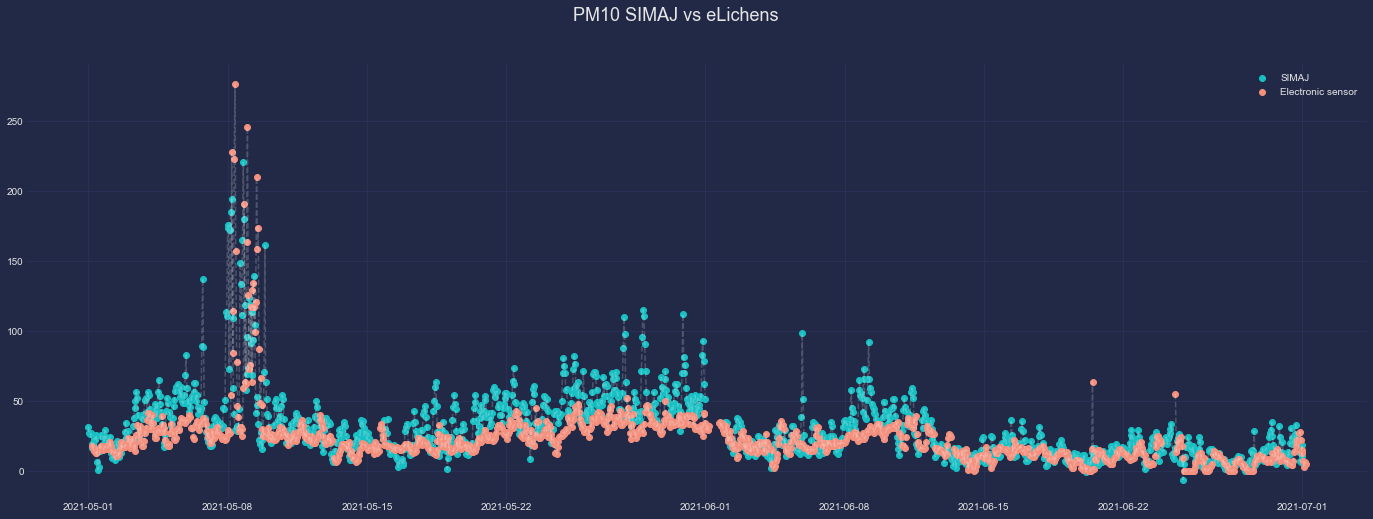

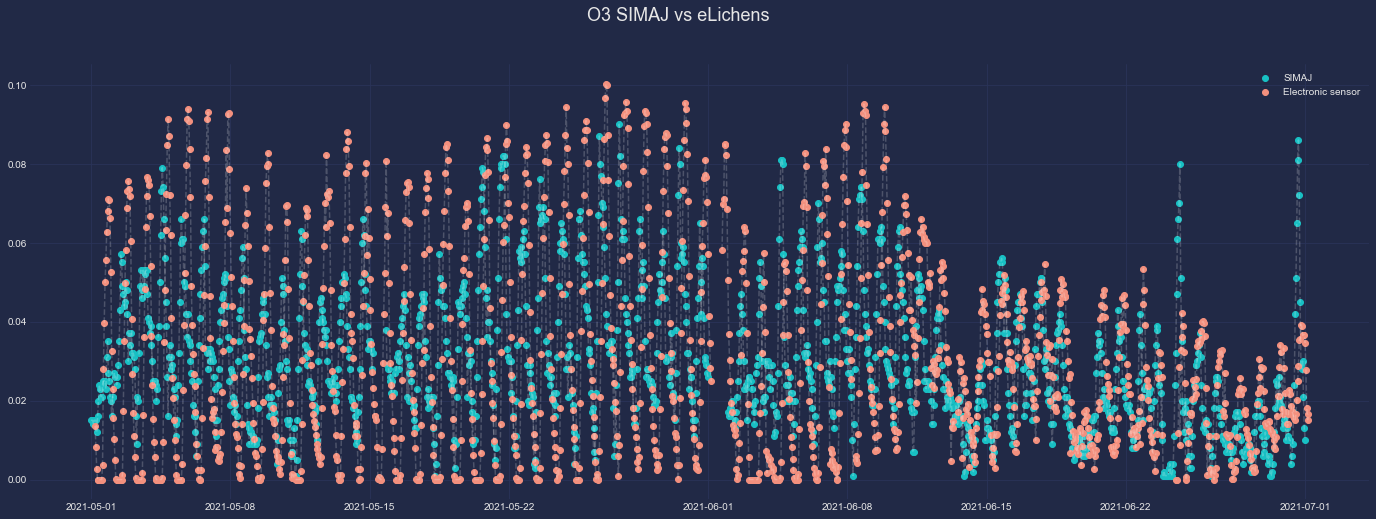

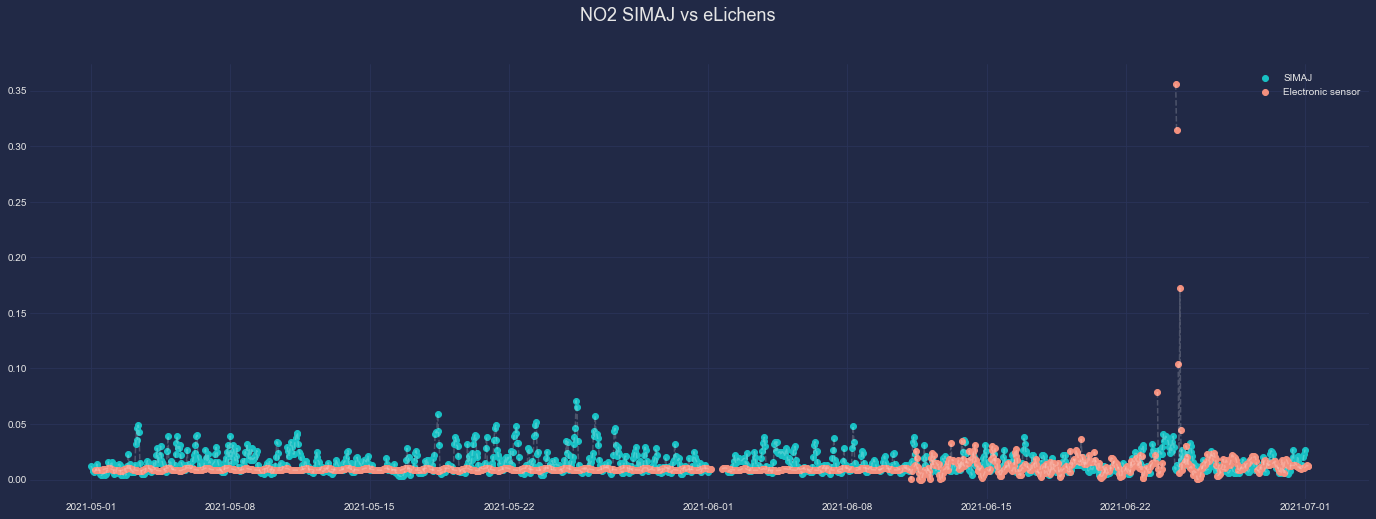

In [15]:
param = ['PM10','O3','NO2']
for p in param:
    grap_comparison(df_simaj, df_el, p, 'eLichens')

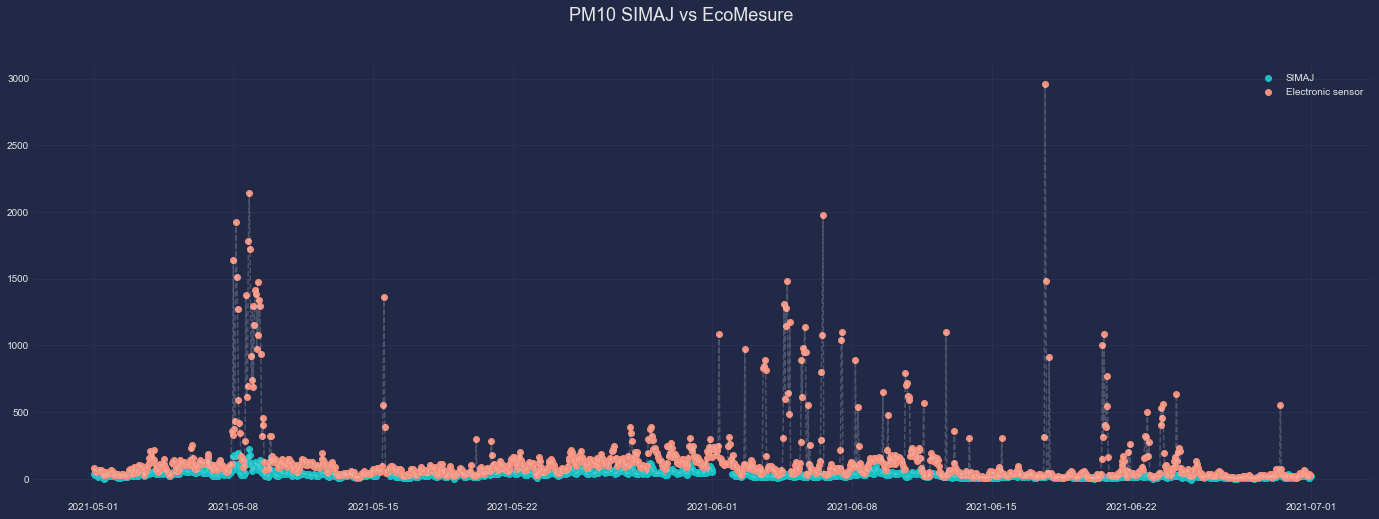

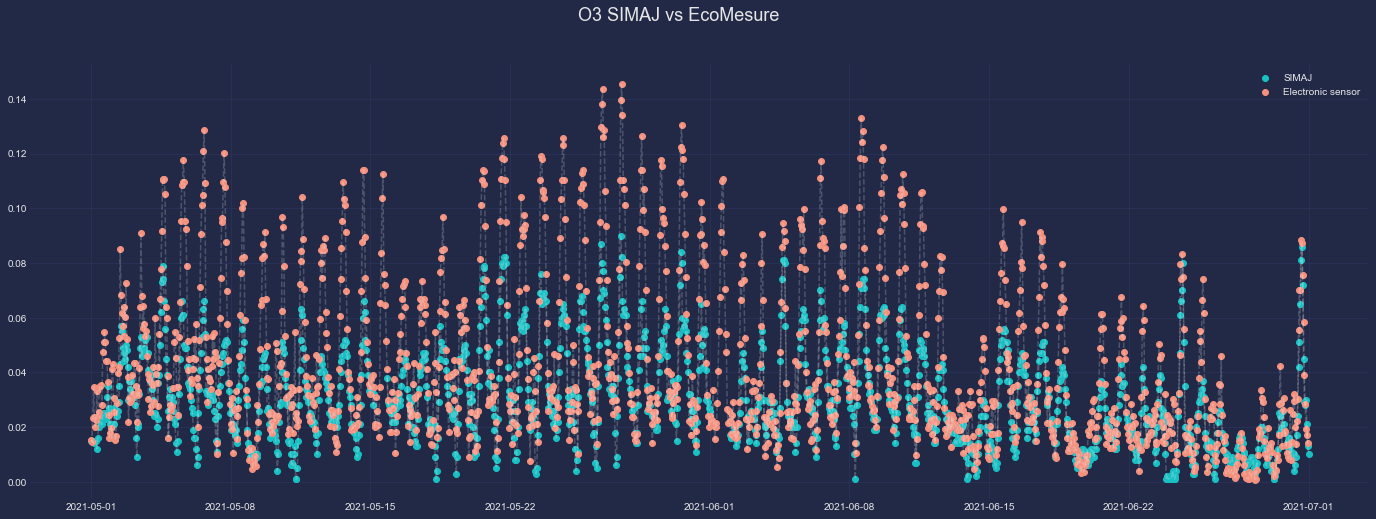

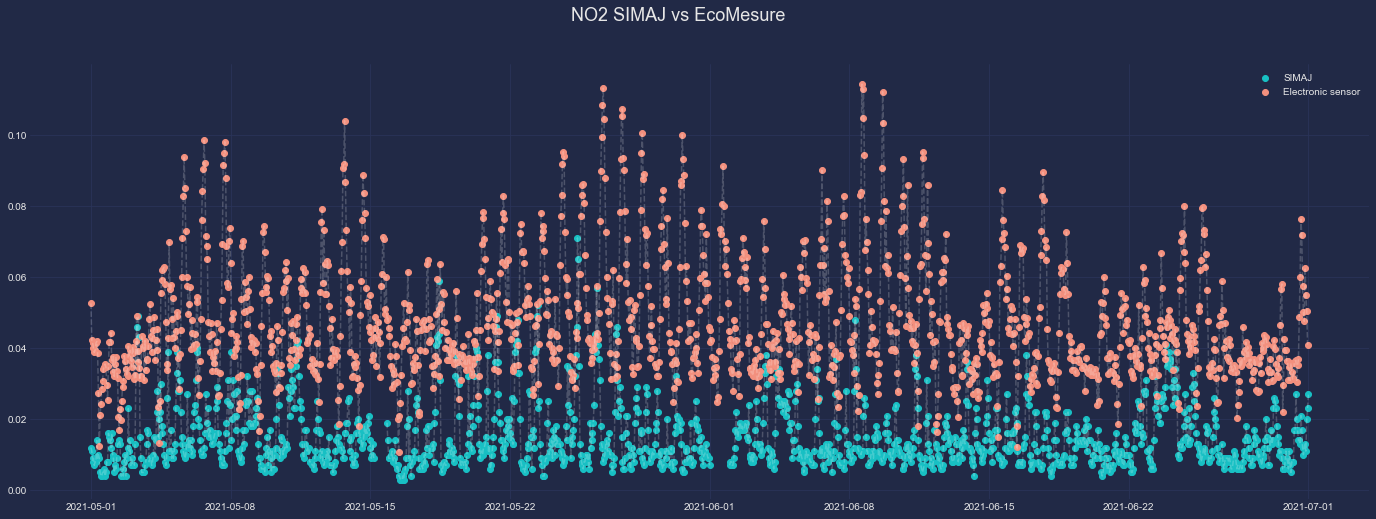

In [16]:
param = ['PM10','O3','NO2']
for p in param:
    grap_comparison(df_simaj, df_ec, p, 'EcoMesure')

# Análisis estadístico

In [17]:
def statistical_analysis(df_simaj, df_electronic, param):
    
    df_merge = pd.merge(df_simaj[['datetime', param]], 
                        df_electronic[['datetime', param]], on='datetime', how='left')
    
    df_merge = df_merge.dropna()
    coef_pearson, p = stats.pearsonr(df_merge[param+'_x'], df_merge[param+'_y'])
    coef_pearson = round(coef_pearson,3)
    rmse = round(mean_squared_error(df_merge[param+'_x'], df_merge[param+'_y'], squared=False), 3)
    num = (((df_merge[param+'_y']-df_merge[param+'_x'])**2).sum())
    den = ((abs(df_merge[param+'_y']-df_merge[param+'_x'].mean()) + 
            abs(df_merge[param+'_x']-df_merge[param+'_x'].mean()))**2).sum()
    ia = round(1 - (num / den),3)
    r2 = round(r2_score(df_merge[param+'_x'], df_merge[param+'_y']),3)
    
    
    return coef_pearson, rmse, ia, r2

In [18]:
df_merge = pd.merge(df_simaj[['datetime', 'PM10']], 
                        df_ec[['datetime', 'PM10']], on='datetime', how='left')
df_merge.dropna(inplace=True)

In [19]:
statistical_analysis(df_simaj, df_ec, 'PM10')

(0.488, 250.165, 0.17, -109.064)

In [20]:
param = ['PM10','O3','NO2']
sensor_eval = {}

for p in param:
    #ecomesure
    pearson, rmse, ia, r2 = statistical_analysis(df_simaj, df_ec, p)
    sensor_eval['Eco'+p] = [pearson, rmse, ia, r2]
    #elichens
    pearson, rmse, ia, r2 = statistical_analysis(df_simaj, df_el, p)
    sensor_eval['Eli'+p] = [pearson, rmse, ia, r2]
    

In [21]:
sensor_eval

{'EcoPM10': [0.488, 250.165, 0.17, -109.064],
 'EliPM10': [0.507, 23.748, 0.663, 0.023],
 'EcoO3': [0.892, 0.021, 0.817, -0.399],
 'EliO3': [0.269, 0.027, 0.529, -1.467],
 'EcoNO2': [-0.014, 0.037, 0.235, -16.301],
 'EliNO2': [-0.027, 0.017, 0.192, -2.798]}